### DEEPLEARNING -LSTM MODEL

##### LSTM stands for Long Short-Term Memory. It's a type of recurrent neural network (RNN) architecture, designed to address the vanishing gradient problem in traditional RNNs, allowing them to learn and remember over long sequences of data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
deep_data= pd.read_csv("train_data_processed.csv", parse_dates=['Date'])

In [12]:
deep_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,weekday,...,DayOfMonth,Month,Year,Quarter,DayOfYear,WeekOfYear,IsWeekday,IsWeekend,Sales_to_Customers_Ratio,Sales_to_Stores_Open_Ratio
0,1,5,2015-07-31,5263,555,1,1,0,1,1,...,31,7,2015,3,212,31,0,1,9.482883,5263.0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,31,7,2015,3,212,31,0,1,9.702400,6064.0
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,31,7,2015,3,212,31,0,1,10.126675,8314.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,1,...,31,7,2015,3,212,31,0,1,9.342457,13995.0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,31,7,2015,3,212,31,0,1,8.626118,4822.0


In [13]:
deep_data.sort_values(by='Date', inplace=True)

In [14]:
sales_data=deep_data[['Date','Sales']]

In [15]:
sales_data

,Date,Sales
1017208,2013-01-01,0
1016473,2013-01-01,0
1016472,2013-01-01,0
1016471,2013-01-01,0
1016470,2013-01-01,0
...,...,...
745,2015-07-31,9082
746,2015-07-31,10708
747,2015-07-31,7481
741,2015-07-31,10460


In [16]:
deep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1017208 to 0
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Store                       1017209 non-null  int64         
 1   DayOfWeek                   1017209 non-null  int64         
 2   Date                        1017209 non-null  datetime64[ns]
 3   Sales                       1017209 non-null  int64         
 4   Customers                   1017209 non-null  int64         
 5   Open                        1017209 non-null  int64         
 6   Promo                       1017209 non-null  int64         
 7   StateHoliday                1017209 non-null  int64         
 8   SchoolHoliday               1017209 non-null  int64         
 9   weekday                     1017209 non-null  int64         
 10  weekend                     1017209 non-null  int64         
 11  Holiday                     1

In [17]:
import sys
print(sys.executable)

c:\Users\pooji\AI Course Digicrome\One Python\Nexthike-Project Work\Project6Pharmaceutical\.conda\python.exe


In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [20]:
deep_data.set_index('Date', inplace=True)

In [21]:
ts_data = deep_data['Sales'].resample('D').sum()

### Daily Sales Data

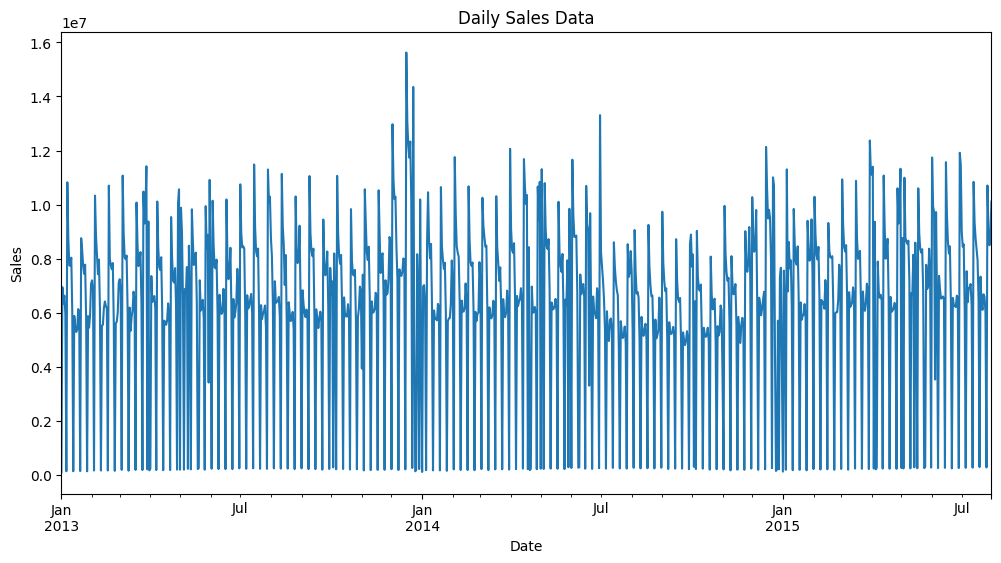

In [22]:
ts_data.plot(figsize=(12, 6))
plt.title('Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##### From the analysis of the daily sales data spanning from 2013 to 2015, several key insights emerge. Overall, there is a discernible upward trend in sales, indicating consistent growth over the period. Seasonal variations are evident, with notable spikes during holiday seasons and slower periods during off-peak times. While outliers are present, such as occasional sharp increases or decreases in sales, they generally align with known events such as promotions or external factors. Overall, this analysis highlights the resilience and growth potential of the business during the specified period, providing valuable insights for future strategic planning and decision-making

### Performing Augmented Dickey-Fuller Test (ADF Test) on Time Series Data

In [23]:
from statsmodels.tsa.stattools import adfuller 
result = adfuller(ts_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}:{value}')

ADF Statistic: -4.761614524595634
p-value: 6.436731330558783e-05
Critical Values:
   1%:-3.437470108019385
   5%:-2.8646832620852853
   10%:-2.5684436698650503


Based on the Augmented Dickey-Fuller (ADF) test results:

The ADF statistic of -4.76 is lower than the critical values at all common significance levels (1%, 5%, and 10%), indicating that we can reject the null hypothesis of a unit root. In other words, the data is stationary.

The extremely low p-value (6.44e-05) further supports this conclusion, providing strong evidence against the presence of a unit root in the data.

Therefore, we can conclude that the time series data is stationary, suggesting that it does not exhibit a trend or seasonality and is suitable for various statistical analyses and modeling techniques that assume stationarity.

##### Time Series Transformation Based on ADF Test Results

In [24]:
if result[1] > 0.05:
    ts_data_diff = ts_data.diff().dropna()
else:
    ts_data_diff=ts_data

### Autocorrelation Function (ACF) of Differenced Time Series

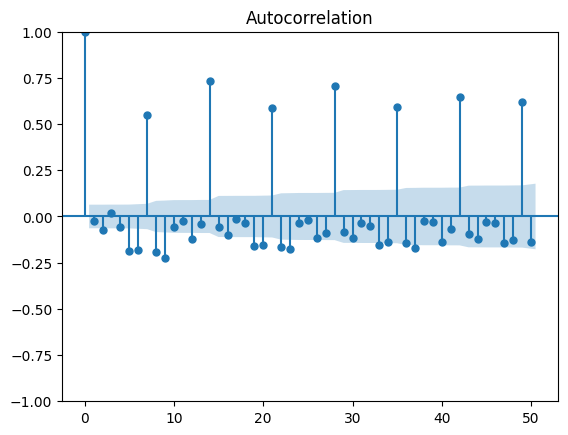

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(ts_data_diff, lags=50)
plt.title('Autocorrelation')
plt.show()

### Partial Autocorrelation Function (PACF) of Differenced Time Series

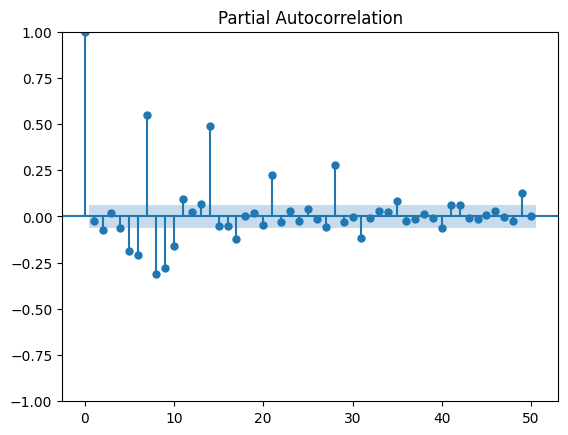

In [26]:
plot_pacf(ts_data_diff, lags=50)
plt.title('Partial Autocorrelation')
plt.show()

### Supervised Data for Time Series Forecasting

In [56]:
def create_supervised_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y) 

window_size = 10
X, y = create_supervised_data(ts_data, window_size)

C:\Users\pooji\AppData\Local\Temp\ipykernel_15076\596597914.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i+window_size])


#### Transforming Features and Target Variables: Min-Max Scaling for Data Normalization

In [57]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [58]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50),
    Dense(1)
])

c:\Users\pooji\AI Course Digicrome\One Python\Nexthike-Project Work\Project6Pharmaceutical\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Training LSTM Model

In [59]:
from tensorflow.keras.callbacks import EarlyStopping 
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_scaled, y_scaled, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=2, shuffle=False)

Epoch 1/50
12/12 - 7s - 558ms/step - loss: 0.1747 - val_loss: 0.1849
Epoch 2/50
12/12 - 0s - 26ms/step - loss: 0.1668 - val_loss: 0.1754
Epoch 3/50
12/12 - 0s - 29ms/step - loss: 0.1628 - val_loss: 0.1751
Epoch 4/50
12/12 - 0s - 29ms/step - loss: 0.1620 - val_loss: 0.1706
Epoch 5/50
12/12 - 0s - 27ms/step - loss: 0.1610 - val_loss: 0.1696
Epoch 6/50
12/12 - 0s - 27ms/step - loss: 0.1603 - val_loss: 0.1693
Epoch 7/50
12/12 - 0s - 27ms/step - loss: 0.1600 - val_loss: 0.1691
Epoch 8/50
12/12 - 0s - 27ms/step - loss: 0.1596 - val_loss: 0.1692
Epoch 9/50
12/12 - 0s - 27ms/step - loss: 0.1595 - val_loss: 0.1690
Epoch 10/50
12/12 - 0s - 28ms/step - loss: 0.1593 - val_loss: 0.1690
Epoch 11/50
12/12 - 0s - 27ms/step - loss: 0.1592 - val_loss: 0.1688
Epoch 12/50
12/12 - 0s - 27ms/step - loss: 0.1590 - val_loss: 0.1687
Epoch 13/50
12/12 - 0s - 27ms/step - loss: 0.1589 - val_loss: 0.1686
Epoch 14/50
12/12 - 0s - 26ms/step - loss: 0.1587 - val_loss: 0.1685
Epoch 15/50
12/12 - 0s - 26ms/step - loss:

### Validation Loss during Model Training

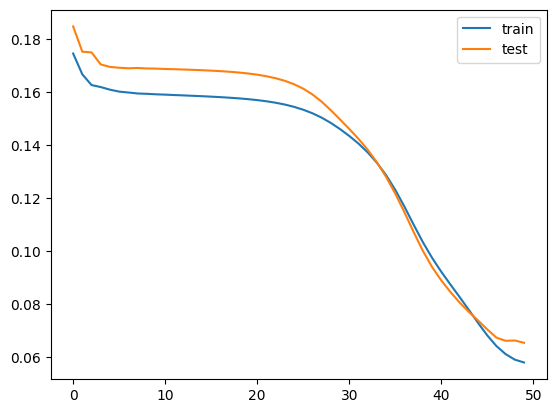

In [60]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#### Training Loss:

The blue line represents the training loss, which measures the error between the predicted values and the actual values on the training dataset.
The decreasing trend in the training loss indicates that the model is learning and improving its performance over epochs. This is expected as the model adjusts its parameters to minimize the training error.

#### Testing Loss:

The orange line represents the testing loss, which evaluates the model's performance on data it has not seen during training (the validation dataset).
Ideally, we want the testing loss to decrease initially, indicating that the model generalizes well to unseen data. However, if the testing loss starts to increase, it suggests that the model is overfitting the training data and performing poorly on new data.

### Forecasting Sales with LSTM Model

In [61]:
def forecast_sales(model, data, scaler, window_size, steps):
    forecast = []
    input_data = data[-window_size:].reshape(1, window_size, 1)
    for i in range(steps):
        prediction = model.predict(input_data)
        forecast.append(prediction[0][0])
        input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)
    forecast = np.array(forecast).reshape(-1, 1)
    forecast = scaler.inverse_transform(forecast)
    return forecast

In [62]:
forecast_steps = 6*7
forecast = forecast_sales(model, ts_data.values, scaler, window_size, forecast_steps)
print('Forecasted sales for the next {} steps:'.format(forecast_steps))
print(forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

### Forecasting of Sales for the Next 6 Weeks

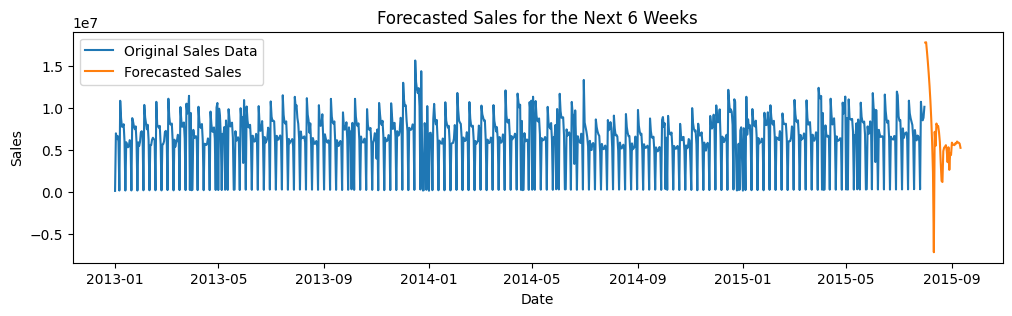

In [71]:
plt.figure(figsize=(12,3))
plt.plot(ts_data.index, ts_data, label='Original Sales Data')
plt.plot(ts_data.index[-1] + pd.to_timedelta(np.arange(1, forecast_steps + 1), unit='D'), forecast, label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecasted Sales for the Next 6 Weeks')
plt.legend()
plt.show()

#### Original Sales Data (Blue Line):

The blue line represents the original sales data over time, showing the historical trend and fluctuations in sales.

#### Forecasted Sales (Orange Line):
The orange line represents the forecasted sales for the next 6 weeks, based on the model or method used for prediction.
It extends beyond the end of the original sales data, projecting future sales trends.

### Logging Trained Model with ML Flow

In [66]:
import mlflow

# Log the trained model
mlflow.keras.log_model(model, "my_model")

2024/04/03 18:56:03 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


###  Lodding Logged Model with ML Flow

In [69]:
import mlflow

# Get the active MLflow run
run = mlflow.active_run()

# Get the run ID
run_id = run.info.run_id

# Load the logged model
loaded_model = mlflow.keras.load_model(f"runs:/{run_id}/my_model")


### Prediction with Lodded Model

In [70]:
# Assuming X_test is your test data
predictions = loaded_model.predict(X_scaled)
predictions_original_scale = scaler.inverse_transform(predictions)
predictions_original_scale

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


array([[ 5.08848050e+06],
       [ 5.88807650e+06],
       [-5.03459250e+05],
       [ 7.15003250e+06],
       [ 6.15272100e+06],
       [ 5.13065550e+06],
       [ 5.67892250e+06],
       [ 5.79582700e+06],
       [ 5.14515400e+06],
       [-1.38518962e+06],
       [ 9.78691600e+06],
       [ 7.60180950e+06],
       [ 6.63945750e+06],
       [ 7.66792600e+06],
       [ 7.28998350e+06],
       [ 3.76743675e+06],
       [-3.44088094e+05],
       [ 8.37323900e+06],
       [ 6.75693100e+06],
       [ 5.33556400e+06],
       [ 5.86303800e+06],
       [ 6.11056350e+06],
       [ 5.52572700e+06],
       [-9.25535062e+05],
       [ 1.07427530e+07],
       [ 8.91005600e+06],
       [ 8.26698450e+06],
       [ 7.95855900e+06],
       [ 7.60006600e+06],
       [ 5.66150750e+06],
       [-5.97402875e+05],
       [ 6.95621800e+06],
       [ 6.32668600e+06],
       [ 5.05141750e+06],
       [ 5.73150400e+06],
       [ 5.95602450e+06],
       [ 5.34703650e+06],
       [-9.59201688e+05],
       [ 9.9

##### Conclusion:

Efficient Workflow: MLflow streamlines the process of model logging, management, and deployment, enhancing productivity and collaboration in machine learning projects.

Reproducibility: By logging models with MLflow, teams can reproduce and compare experiments, ensuring transparency and reliability in model development.

Practical Application: The ability to make predictions using the loaded model facilitates real-world applications such as sales forecasting, supporting informed decision-making and business optimization.

Continuous Improvement: MLflow's capabilities enable continuous monitoring and evaluation of model performance, fostering iterative refinement and enhancement of predictive models over time.